In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import os
import datetime

from PIL import Image

from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [ ]:
dir_path = '/content/drive/MyDrive/AE/animal/tiger/'

In [ ]:
train_list = sorted(os.listdir(dir_path))

['pixabay_wild_000810.jpg', 'pixabay_wild_000811.jpg', 'pixabay_wild_000812.jpg', 'pixabay_wild_000813.jpg', 'pixabay_wild_000814.jpg', 'pixabay_wild_000815.jpg', 'pixabay_wild_000816.jpg', 'pixabay_wild_000817.jpg', 'pixabay_wild_000818.jpg', 'pixabay_wild_000819.jpg', 'pixabay_wild_000820.jpg', 'pixabay_wild_000821.jpg', 'pixabay_wild_000822.jpg', 'pixabay_wild_000823.jpg', 'pixabay_wild_000824.jpg', 'pixabay_wild_000825.jpg', 'pixabay_wild_000826.jpg', 'pixabay_wild_000827.jpg', 'pixabay_wild_000828.jpg', 'pixabay_wild_000829.jpg', 'pixabay_wild_000830.jpg', 'pixabay_wild_000831.jpg', 'pixabay_wild_000832.jpg', 'pixabay_wild_000833.jpg', 'pixabay_wild_000834.jpg', 'pixabay_wild_000835.jpg', 'pixabay_wild_000836.jpg', 'pixabay_wild_000837.jpg', 'pixabay_wild_000839.jpg', 'pixabay_wild_000841.jpg', 'pixabay_wild_000842.jpg', 'pixabay_wild_000843.jpg', 'pixabay_wild_000844.jpg', 'pixabay_wild_000845.jpg', 'pixabay_wild_000846.jpg', 'pixabay_wild_000847.jpg', 'pixabay_wild_000848.jpg', 

In [ ]:
img_train = []
for name in train_list:
  img = Image.open('%s%s'%(dir_path, name))
  img_array = np.array(img)
  img_resize = cv2.resize(img_array, (400, 400), interpolation = cv2.INTER_AREA)
  img_train.append(img_resize)

print(len(img_train))

118


In [ ]:
npa = np.array(img_train)

In [ ]:
npa.shape

(118, 400, 400, 3)

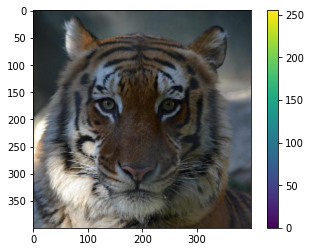

In [ ]:
plt.figure
plt.imshow(npa[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
data_set = npa.astype('float32') / 255.

In [ ]:
print(data_set.shape)
print(type(data_set))

(118, 400, 400, 3)
<class 'numpy.ndarray'>


In [ ]:
x_train = data_set[:85]
x_test = data_set[85:]

**Split Train and Test data by 7:3 **

In [ ]:
print(x_train.shape)
print(x_test.shape)

(85, 400, 400, 3)
(33, 400, 400, 3)


In [ ]:
class AutoEncoder(Model):
  def __init__(self, latent_dim):
    super(AutoEncoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),                                    
    ])

    self.decoder = tf.keras.Sequential([
      layers.Dense(786432, activation='sigmoid'),
      layers.Reshape((512, 512, 3))                                    
    ]) 

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
latent_dim = 128
auto_encoder = AutoEncoder(latent_dim)

In [ ]:
auto_encoder.compile(optimizer='adam', 
                     loss=losses.MeanSquaredError(), 
                     metrics=['acc'])

In [ ]:
# 학습데이터의 log를 저장할 폴더 생성 (지정)
log_dir = "/content/drive/MyDrive/AE/AE_using_mvtec/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# 텐서보드 콜백 정의 하기
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
history = auto_encoder.fit(x_train, x_train,
                 epochs = 60,
                 shuffle=True,
                 validation_data=(x_test, x_test),
                 callbacks = [tensorboard_callback])

Epoch 1/60
3/3 [==============================] - 13s 3s/step - loss: 0.0639 - acc: 0.3339 - val_loss: 0.0571 - val_acc: 0.3353
Epoch 2/60
3/3 [==============================] - 15s 4s/step - loss: 0.0645 - acc: 0.3368 - val_loss: 0.0570 - val_acc: 0.3818
Epoch 3/60
3/3 [==============================] - 9s 3s/step - loss: 0.0631 - acc: 0.3788 - val_loss: 0.0569 - val_acc: 0.3498
Epoch 4/60
3/3 [==============================] - 8s 3s/step - loss: 0.0650 - acc: 0.3826 - val_loss: 0.0551 - val_acc: 0.4104
Epoch 5/60
3/3 [==============================] - 8s 3s/step - loss: 0.0618 - acc: 0.4580 - val_loss: 0.0523 - val_acc: 0.5098
Epoch 6/60
3/3 [==============================] - 8s 3s/step - loss: 0.0575 - acc: 0.5877 - val_loss: 0.0560 - val_acc: 0.5301
Epoch 7/60
3/3 [==============================] - 9s 3s/step - loss: 0.0567 - acc: 0.6007 - val_loss: 0.0515 - val_acc: 0.5243
Epoch 8/60
3/3 [==============================] - 8s 3s/step - loss: 0.0558 - acc: 0.5886 - val_loss: 0.0513 

In [ ]:
encoded_imgs = auto_encoder.encoder(x_test).numpy() 
decoded_imgs = auto_encoder.decoder(encoded_imgs).numpy()

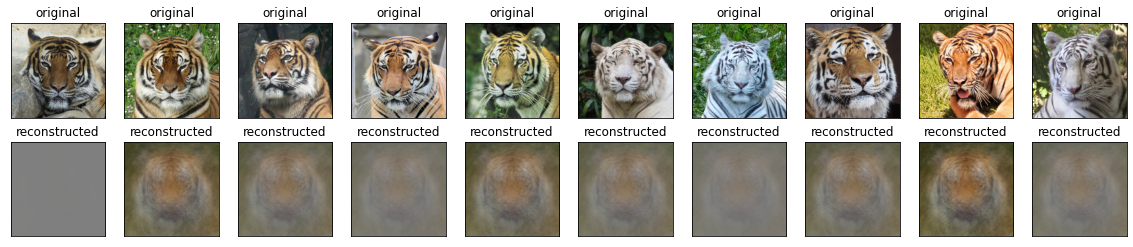

In [ ]:
n = 10
plt.figure(figsize= (20,4))
for i in range(n):
  #original img display
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #reconstruction img display
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

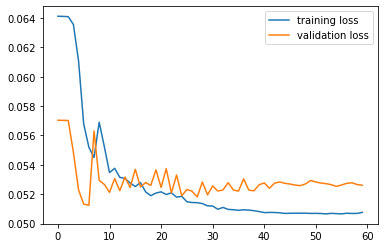

In [ ]:
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.show()